# Assignment No 1:Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [28]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston_data = load_boston()

In [29]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


data: contains the information for various houses
target: prices of the house
feature_names: names of the features
DESCR: describes the dataset

In [30]:
bos = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.


In [31]:
bos['MEDV'] = boston_data.target

# Data Preprocessing

In [32]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Here  we can observe that there are no null values

# EDA

In [33]:
import seaborn as sns 

%matplotlib inline

We can observe that the values of variable MEDV are distributed normally.There are few outliers.

<AxesSubplot:>

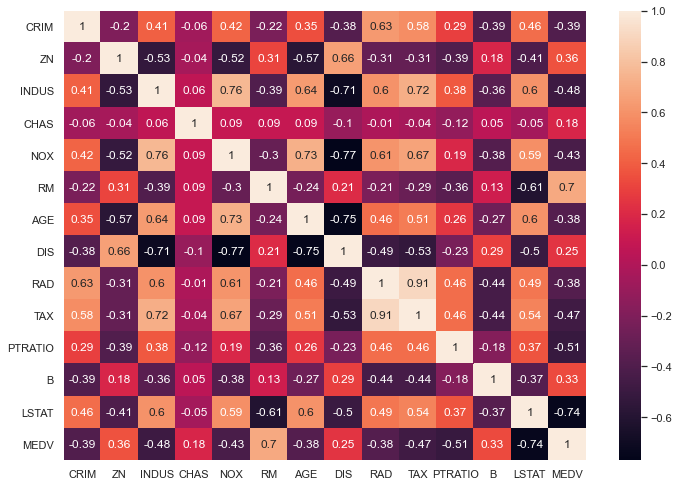

In [35]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Observations:
    1.Using the above heatmap we will select those features which have a high correlation with the target variable MEDV
    2.RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

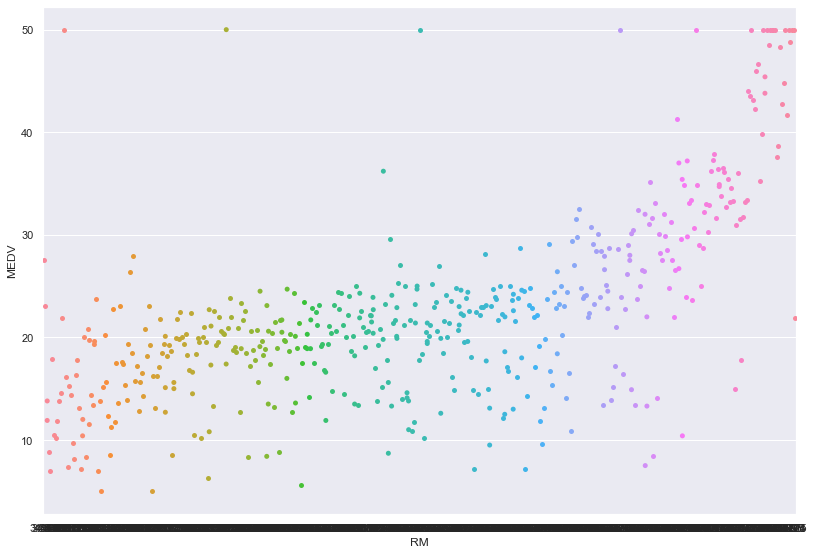

In [57]:
sns.stripplot(x ="RM", y ="MEDV",data = bos)

we can observe that the prices increases as value of RM increases.

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

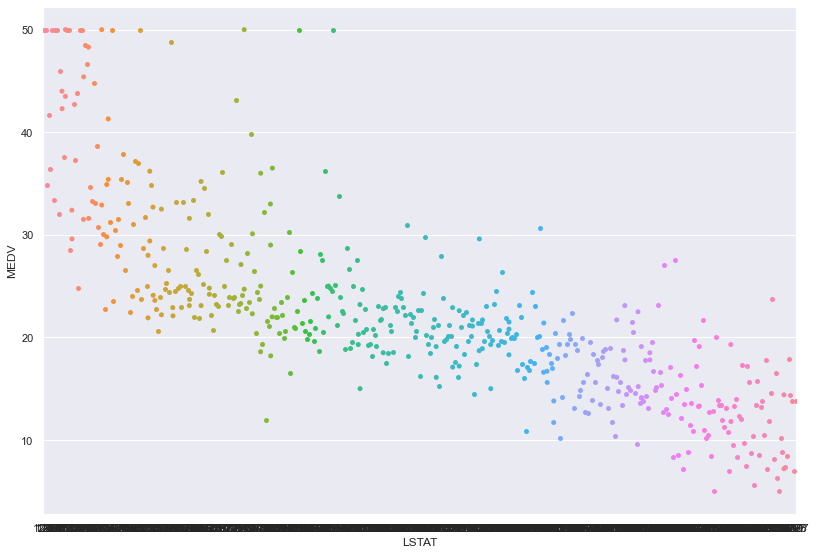

In [59]:
sns.stripplot(x ="LSTAT", y ="MEDV",data = bos)

The prices decrease with an increase in variable LSTAT

Now we will concatenate RM and LSTAT using np.c_

In [37]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM']], columns = ['LSTAT','RM'])
Y = bos['MEDV']

Following code splits data into  training and testing sets

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Training and testing the model

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [64]:
# model evaluation for training set
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = sklearn.metrics.r2_score(Y_train, y_train_predict)

print("Performance of model for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = sklearn.metrics.r2_score(Y_test, y_test_predict)

print("Performance of model for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Performance of model for training set
--------------------------------------
RMSE is 5.469313146224185
R2 score is 0.6352394784952111


Performance of model for testing set
--------------------------------------
RMSE is 5.766369317319989
R2 score is 0.6420358191045995
